<a href="https://colab.research.google.com/github/NayakAbhishek/NayakAbhishek/blob/main/Machine_Learning_in_Financial_Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in Financial Markets

We explore aspects of machine learning in finance. We will use different machine learning models (Logistic Regression, Random Forest Classifier, K Nearest Neighbors, Support Vector Classifier) to see if we can predict whether today's returns for Apple stocks will be positive or negative based on the returns of the 4 previous days and we compare these models prediction accuracy.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Financial data retrieval
import yfinance as yf
import pandas_datareader as pdr

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix


# yf.pdr_override() is deprecated.
# Now directly use yf with pandas_datareader
# For example to download data for Apple
# data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")

We will focus on the stock prices from Apple. We construct a dataframe with the daily returns from 2001-01-01 until today. Also, next to today's returns, we place the the returns from the 4 previous days.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr

start = pd.to_datetime('2001-01-01')
stock = ['AAPL']

# Directly use yf with pandas_datareader
data = yf.download(stock, start=start)['Adj Close']

df = pd.DataFrame()
df['Today'] = (data/data.shift(1))-1
df['Lag1'] = df['Today'].shift(1)
df['Lag2'] = df['Today'].shift(2)
df['Lag3'] = df['Today'].shift(3)
df['Lag4'] = df['Today'].shift(4)
df.dropna(inplace = True)
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Today,Lag1,Lag2,Lag3,Lag4
Date,,,,,
2001-01-09,0.037736,0.011450,-0.040294,0.041986,0.100841
2001-01-10,-0.036364,0.037736,0.011450,-0.040294,0.041986
2001-01-11,0.086793,-0.036364,0.037736,0.011450,-0.040294
2001-01-12,-0.045139,0.086793,-0.036364,0.037736,0.011450
2001-01-16,-0.003636,-0.045139,0.086793,-0.036364,0.037736
2001-01-17,-0.018250,-0.003636,-0.045139,0.086793,-0.036364
2001-01-18,0.111524,-0.018250,-0.003636,-0.045139,0.086793
2001-01-19,0.043479,0.111524,-0.018250,-0.003636,-0.045139
2001-01-22,-0.012820,0.043479,0.111524,-0.018250,-0.003636


from matplotlib import pyplot as plt
_df_0['Today'].plot(kind='hist', bins=20, title='Today')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Lag1'].plot(kind='hist', bins=20, title='Lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lag2'].plot(kind='hist', bins=20, title='Lag2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Lag3'].plot(kind='hist', bins=20, title='Lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Today', y='Lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Lag1', y='Lag2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Lag2', y='Lag3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Lag3', y='Lag4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Today'].plot(kind='line', figsize=(8, 4), title='Today')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Lag1'].plot(kind='line', figsize=(8, 4), title='Lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Lag2'].plot(kind='line', figsize=(8, 4), title='Lag2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Lag3'].plot(kind='line', figsize=(8, 4), title='Lag3')
plt.gca().spines[['top', 'right']].set_visible(False)

We construct an additional column to our data frame to indicate whether on a given day the returns were positive or negative. If the returns were positive we label this with 1, and with 0 otherwise.

In [ ]:
def direction(x):
    if x>0:
        return 1.0
    else:
        return 0.0

In [ ]:
df['Direction'] = df['Today'].apply(direction)
df.head()

,Today,Lag1,Lag2,Lag3,Lag4,Direction
Date,,,,,,
2001-01-09,0.037736,0.011450,-0.040294,0.041986,0.100841,1.0
2001-01-10,-0.036364,0.037736,0.011450,-0.040294,0.041986,0.0
2001-01-11,0.086793,-0.036364,0.037736,0.011450,-0.040294,1.0
2001-01-12,-0.045139,0.086793,-0.036364,0.037736,0.011450,0.0
2001-01-16,-0.003636,-0.045139,0.086793,-0.036364,0.037736,0.0


from matplotlib import pyplot as plt
_df_12['Today'].plot(kind='hist', bins=20, title='Today')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Lag1'].plot(kind='hist', bins=20, title='Lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Lag2'].plot(kind='hist', bins=20, title='Lag2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Lag3'].plot(kind='hist', bins=20, title='Lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Today', y='Lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Lag1', y='Lag2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Lag2', y='Lag3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Lag3', y='Lag4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Today'].plot(kind='line', figsize=(8, 4), title='Today')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Lag1'].plot(kind='line', figsize=(8, 4), title='Lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Lag2'].plot(kind='line', figsize=(8, 4), title='Lag2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Lag3'].plot(kind='line', figsize=(8, 4), title='Lag3')
plt.gca().spines[['top', 'right']].set_visible(False)

We will now use machine learning models to try to predict whether a share will have a positive return (labeled as 1) or a negative return (labeled as 1) based on the values of the returns from the 4 previous days. For this, we build our test and train data sets. We set the date 2019-01-01 as the begining of our test sets.

In [ ]:
X = df[['Lag1','Lag2','Lag3','Lag4']]
y = df['Direction']

In [ ]:
start_test = pd.to_datetime('2019-01-01')
# start_test = datetime.datetime(2005,1,1)

X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

# ===============================================

## Logistic Regression

We implement the logistic regression model:

In [ ]:
logmodel = LogisticRegression(C = 10.0,solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression(C=10.0)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = logmodel.predict(X_test)

In [ ]:
print('Logistic Regression Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ', round(logmodel.score(X_test,y_test), 2)) # Call round() on the float directly

Logistic Regression Model
              precision    recall  f1-score   support

         0.0       0.54      0.07      0.13       669
         1.0       0.54      0.95      0.69       783

    accuracy                           0.54      1452
   macro avg       0.54      0.51      0.41      1452
weighted avg       0.54      0.54      0.43      1452

Confusion Matrix
[[ 50 619]
 [ 43 740]]
Accuracy:  0.54


The model has a 0.54 accuracy, which is no much better than a flip coin.

# =============================================

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print('Random Forest Classifier Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print(f'Accuracy: {rfc.score(X_test,y_test):.2f}') # Use f-string formatting for rounding

Random Forest Classifier Model
              precision    recall  f1-score   support

         0.0       0.45      0.43      0.44       669
         1.0       0.53      0.56      0.55       783

    accuracy                           0.50      1452
   macro avg       0.49      0.49      0.49      1452
weighted avg       0.50      0.50      0.50      1452

Confusion Matrix
[[285 384]
 [342 441]]
Accuracy: 0.50


Thus, we see that the accuracy is worse than that of the Logistic Regression Model. 0.50 accuracy

# ==============================================

## K Nearest Neighbors

We start the implementation of this model with a number of $K = 100$ nearest neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print('KNN Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',knn.score(X_test,y_test).round(2))

KNN Model
              precision    recall  f1-score   support

         0.0       0.45      0.36      0.40       669
         1.0       0.54      0.63      0.58       783

    accuracy                           0.51      1452
   macro avg       0.49      0.50      0.49      1452
weighted avg       0.50      0.51      0.50      1452

Confusion Matrix
[[238 431]
 [286 497]]
Accuracy:  0.51


We now compute the error rate (i.e. how many times the predictions are different from the actual y_test set) for different values of K. We plot and check where the error is smaller.

In [42]:
error_rate = []

# Will take some time
for i in range(1,500,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

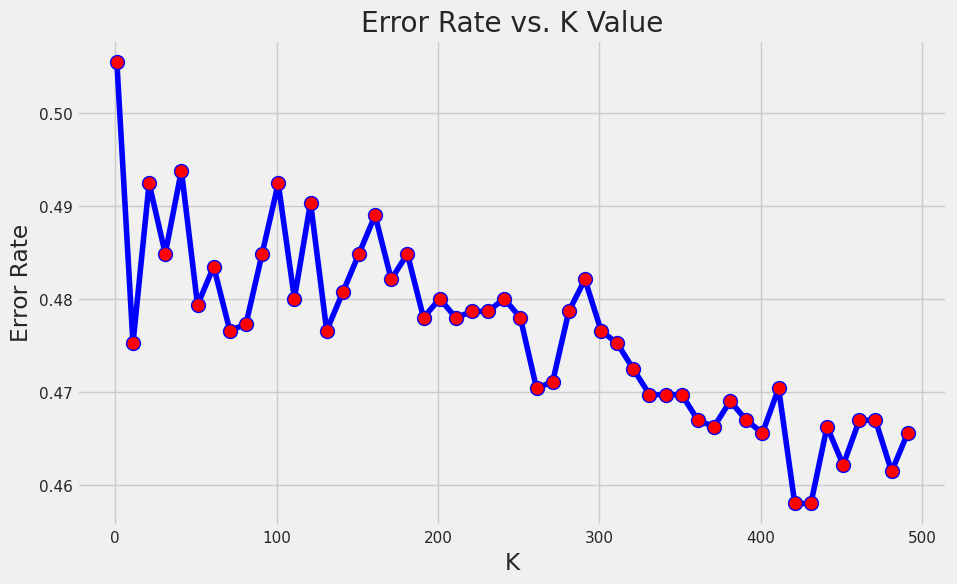

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500,10),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=290)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=290)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=290, p=2,
                     weights='uniform')

We see that the erros is smaller around $K = 290$. Let us try with that value:

In [45]:
pred = knn.predict(X_test)

In [47]:
print('KNN Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
# Use round as a built-in function instead of a method.
print('Accuracy: ', round(knn.score(X_test,y_test), 2))

KNN Model
              precision    recall  f1-score   support

         0.0       0.46      0.25      0.33       669
         1.0       0.54      0.74      0.62       783

    accuracy                           0.52      1452
   macro avg       0.50      0.50      0.47      1452
weighted avg       0.50      0.52      0.49      1452

Confusion Matrix
[[169 500]
 [202 581]]
Accuracy:  0.52


So, the accuracy climbed form 0.51 to 0.52.

# =============================================

## Support Vector Classifier

In [48]:
model = SVC(gamma='scale')
model.fit(X_train,y_train)

SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print('SVC Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
# Applying round to the score
print('Accuracy: ', round(model.score(X_test, y_test), 2))

SVC Model
              precision    recall  f1-score   support

         0.0       0.46      0.25      0.33       669
         1.0       0.54      0.74      0.62       783

    accuracy                           0.52      1452
   macro avg       0.50      0.50      0.47      1452
weighted avg       0.50      0.52      0.49      1452

Confusion Matrix
[[169 500]
 [202 581]]
Accuracy:  0.53


We try to optimize the parameters of the SVC model:

In [51]:
param_grid = {'C': [0.1,1, 10, 100, 1000,1000000.0], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [52]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.520 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.519 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1000000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1000000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)
best_estimator_: SVC
SVC(C=1000000.0, gamma=0.0001)

 SVC?
SVC(C=1000000.0, gamma=0.0001)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1000000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

The optimal parameters are:

In [54]:
grid.best_params_

{'C': 1000000.0, 'gamma': 0.0001, 'kernel': 'rbf'}

{'C': 1000000.0, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
grid.best_estimator_

SVC(C=1000000.0, gamma=0.0001)

In [56]:
grid_predictions = grid.predict(X_test)

In [58]:
print('Optimized SVC Model')
print(25*'===')

print(classification_report(y_test,grid_predictions))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,grid_predictions))
print(25*'===')
print('Accuracy: ', round(model.score(X_test,y_test), 2)) # Call round() with the float and the desired number of decimal places

Optimized SVC Model
              precision    recall  f1-score   support

         0.0       0.47      0.07      0.13       669
         1.0       0.54      0.93      0.68       783

    accuracy                           0.54      1452
   macro avg       0.51      0.50      0.41      1452
weighted avg       0.51      0.54      0.43      1452

Confusion Matrix
[[ 50 619]
 [ 56 727]]
Accuracy:  0.53


And the accuracy of the model climbed from 0.52 to 0.53. However, there seems to be far fewer correct predictions than in the non-optimized model.

The bottom line is that no model thus implemente have an accuracy better than 0.53. This maybe due to the fact that stock prices follow a Weiner process, and thus the returns on a given day have a dependence on the previous returns that should diminish very rapidly from the first day on. Also, we are not taking into consideration data that may reflect the normality of the returns distribution.  